In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import load_model, Model, Sequential
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from keras.utils.np_utils import to_categorical

In [88]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
'''
x_train = x_train.reshape(-1,28,28,1)
y_train = to_categorical(y_train)
x_test = x_test.reshape(-1,28,28,1)
y_test = to_categorical(y_test)
'''

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [44]:
import numpy as np

def onehot(y):
  oh = np.zeros((y.shape[0], 10))
  for i in range(y.shape[0]):
    oh[i, int(y[i])]=1
  return oh

In [89]:
from sklearn import preprocessing
import numpy as np

#enc = preprocessing.OneHotEncoder()

#enc.fit(y_train)

#y_train_oh = enc.transform(y_train).toarray()
#y_train_oh.shape
y_train_oh = onehot(y_train)
y_train_oh.shape

y_test_oh = onehot(y_test)
y_test_oh.shape

x_train_norm = x_train/255.0
x_test_norm = x_test/255.0

#x_train_norm = x_train_norm[:,:,:, np.newaxis] # Optional: Convert 60000x28x28 -> 60000x28x28x1
#x_test_norm = x_test_norm[:,:,:, np.newaxis] # Optional: Convert 60000x28x28 -> 60000x28x28x1

In [90]:
print(x_train_norm.shape)
print(x_test_norm.shape)
print(y_test_oh.shape)
print(y_train_oh.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000, 10)
(60000, 10)


In [94]:

model = Sequential()
model.add(Conv2D(6, (3, 3), padding='same', activation='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(Flatten())
# These like ANN
model.add(Dense(120, activation='relu', use_bias=True))
model.add(Dense(84, activation='relu', use_bias=True))
model.add(Dense(10, activation='softmax', use_bias=True))
#self.model = Model(input, output)

sgd = keras.optimizers.SGD(learning_rate=0.01)
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 1)        0         
 2D)                                                             
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 1)          0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 49)                0         
                                                                 
 dense_9 (Dense)             (None, 120)               6000      
                                                                 
 dense_10 (Dense)            (None, 84)                10164     
                                                                 
 dense_11 (Dense)            (None, 10)               

In [96]:
history = model.fit(x_train_norm, y_train_oh, validation_data = (x_test_norm, y_test_oh), epochs = 50, batch_size = 128)

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 1.9140 - accuracy: 0.4518 - val_loss: 1.4938 - val_accuracy: 0.6629
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 1.1903 - accuracy: 0.6892 - val_loss: 0.9509 - val_accuracy: 0.7379
Epoch 3/50
469/469 [==============================] - 2s 3ms/step - loss: 0.8570 - accuracy: 0.7463 - val_loss: 0.7596 - val_accuracy: 0.7784
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: 0.7255 - accuracy: 0.7796 - val_loss: 0.6692 - val_accuracy: 0.7976
Epoch 5/50
469/469 [==============================] - 2s 3ms/step - loss: 0.6556 - accuracy: 0.7972 - val_loss: 0.6175 - val_accuracy: 0.8092
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.6137 - accuracy: 0.8073 - val_loss: 0.5858 - val_accuracy: 0.8170
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.5859 - accuracy: 0.8144 - val_loss: 0.5633 - val_accuracy: 0.8215
Epoch 

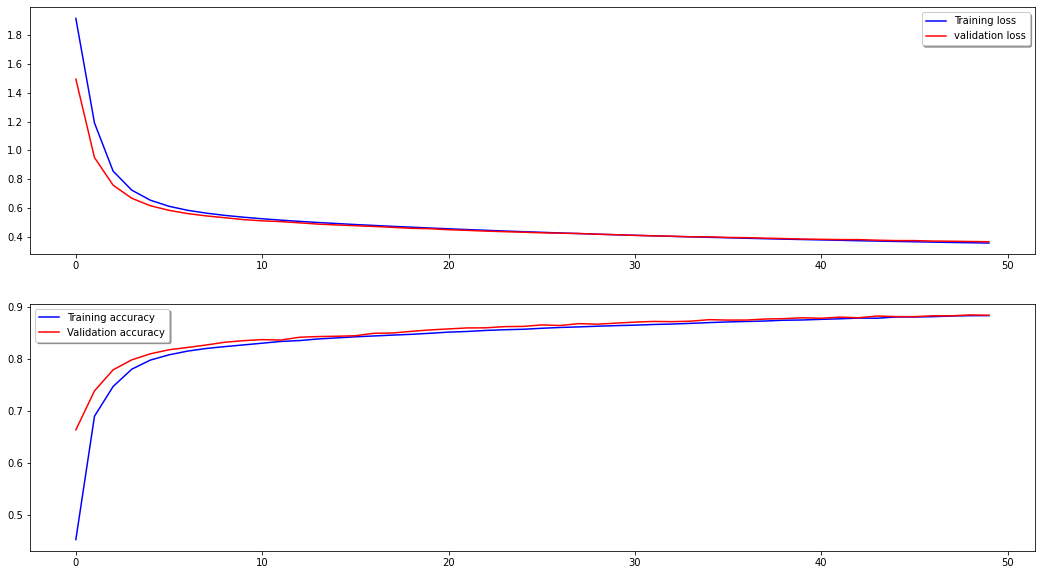

In [97]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [91]:

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [92]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

313/313 [==============================] - 0s 1ms/step
Accuracy: 88.34%

F1 Score: 88.34


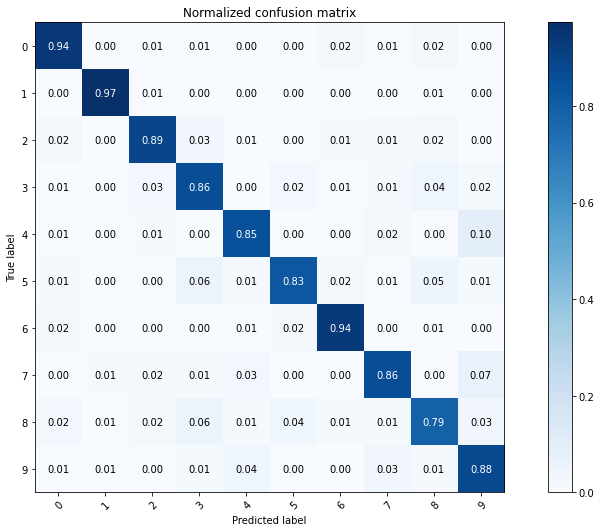

In [98]:
y_pred = model.predict(x_test_norm)

y_pred = np.argmax(y_pred, 1) 
y_test_arg = np.argmax(y_test_oh, 1) 
confusion_matrix(y_test_arg, y_pred)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test_arg, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test_arg, y_pred, average='micro') * 100))

plot_confusion_matrix(y_test_arg, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [ ]:
#cnn.save('/content/drive/MyDrive/Python-may-hoc/Lab_6/lenet.h5')

In [ ]:
new_cnn = LeNetCNN()

new_cnn.load('/content/drive/MyDrive/Python-may-hoc/Lab_6/lenet.h5')
pred = new_cnn.predict(x_test_norm)
index = 300
plt.imshow(x_test[index])
plt.show()
print('Predicted label: ', np.argmax(pred[index]))
print('Ground-truth label: ', y_test[index])

In [ ]:
import matplotlib.pyplot as plt

pred = new_cnn.predict(x_test_norm)
test_index = 1234
plt.imshow(x_test[test_index])
plt.show()
print('Predicted label: ', np.argmax(pred[test_index]))
print('Ground-truth label: ', y_test[test_index])